Video Link : https://youtu.be/1Yw9sC0PNwY

## Feature Scailing
- Feature Scailing is a technique to standardize the independent features present in the data in fixed range
- This is last thing in the feature engineering

The range of standardized data isn’t fixed, but instead depends on the distribution of the data itself. Standardization transforms the data to have:

- A **mean** of 0.
- A **standard deviation** of 1.

This means that after standardization:
- Most of the data will typically fall within the range of **-3 to +3** (or even closer to -2 and +2) due to the properties of the normal distribution.
- Outliers can fall beyond this range but are usually not common.

## Types
- Standardization ( Z-score Normalization)
- Normalization - 1. MinMaxScaler 2. RobustScaler  3.


# Steps/ Intitution
- Take mean of the entire datapoints of the feature denoted by x bar
- xi refers to individual data points 
- sigma is standard deviation
- formula is xi-mean/ sd
- mean is 0 for all standardised value for that column
- sd is 1 for all standardised value for that column
- mean centering
- distribution before and after scaailing is same
- Effect of outlier is not reduced in this (REMEMBER)

## Example

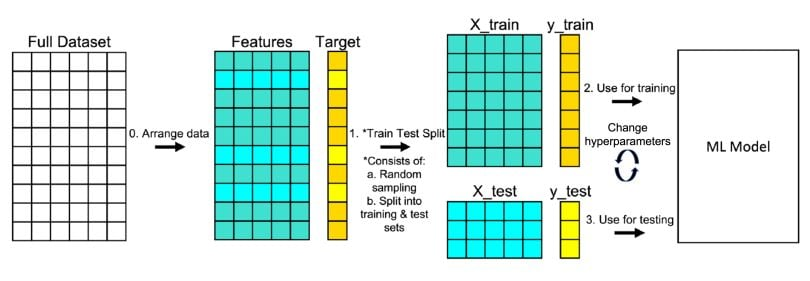

In [102]:
from IPython.display import Image
Image(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\X_train.jpg", width=1000, height=1000)

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\Social_Network_Ads.csv")

In [105]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [106]:
df.drop(['User ID','Gender'],axis=1,inplace=True)

In [107]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [108]:
df.shape

(400, 3)

In [109]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [110]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X = df.drop(['Purchased'],axis=1)

In [113]:
y = df['Purchased']

In [114]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [115]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [117]:
X_train.shape,X_test.shape

((280, 2), (120, 2))

## StandardScaler

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()

## Fit the scaler to the trin set, it will learn the parameters
scaler.fit(X_train)
print("Mean of the scaler is ",scaler.mean_)

## Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mean of the scaler is  [3.77642857e+01 6.99000000e+04]


### <p style="color:red;">Note</p> : Sikhte (fit method) only for X_train and not for X_test but transform dono ko karte ho!!!

In machine learning, when using transformations (such as scaling, encoding, or other preprocessing steps), you fit the transformation only on the training data (X_train), and then transform both the training data (X_train) and the test data (X_test). Here’s why:

Fitting on X_train: When you fit a transformation (e.g., scaling, encoding), you compute statistics or parameters based on the training data. For example:

If you are using StandardScaler, it computes the mean and standard deviation from the training data.
If you are using MinMaxScaler, it computes the min and max values from the training data.
Fitting on X_train ensures that the model learns only from the training data and prevents any data leakage from the test set, which would bias the model evaluation.

Transforming both X_train and X_test: After fitting, the transformation (e.g., scaling based on training data statistics) is applied to both X_train and X_test. The reason you transform X_test is to ensure that both datasets are in the same scale or encoding.

Why not fit on X_test?

Fitting on the test data would expose information from the test set, which is supposed to simulate unseen data. This would lead to data leakage, where your model indirectly "learns" from the test set, which could result in overfitting and unreliable evaluation metrics.
Key steps:
Fit the transformation only on X_train.
Transform both X_train and X_test using the same fitted transformation from X_train.

In [120]:
## Note we gave Dataframe of Training set but we got numpy array so we need to convert back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [121]:
X_train_scaled.shape,X_test_scaled.shape

((280, 2), (120, 2))

In [122]:
X_train_scaled

,Age,EstimatedSalary
0,0.022734,-0.263890
1,0.794317,-1.420262
2,-0.266609,-0.382492
3,0.890765,1.277940
4,0.312078,-0.204589
...,...,...
275,0.794317,1.396542
276,0.987213,-0.856901
277,-1.713327,-1.390612
278,-0.845297,0.299471


In [123]:
## Mean Values before scailing
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.8,69900.0
std,10.4,33786.6
min,18.0,15000.0
25%,30.0,43750.0
50%,37.0,70500.0
75%,46.0,87000.0
max,60.0,150000.0


In [124]:
## After Scailing
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

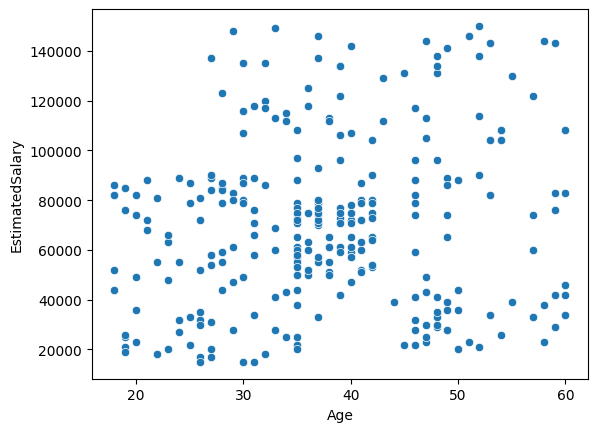

In [125]:
## Scatter plot before vs after
sns.scatterplot(x='Age',y='EstimatedSalary',data=X_train)
# sns.scatterplot(x='Age',y='EstimatedSalary',data=X_train_scaled,color='r')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

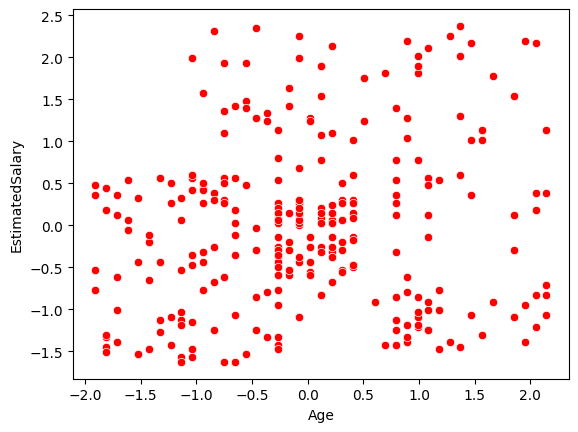

In [126]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=X_train_scaled,color='r')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

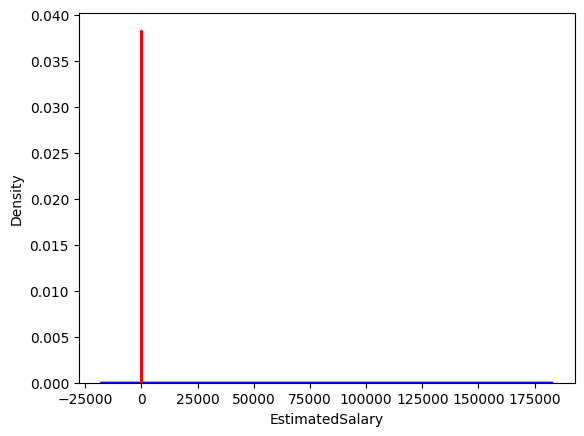

In [127]:
sns.kdeplot(X_train['EstimatedSalary'],color='b')
sns.kdeplot(X_train['Age'],color='r')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

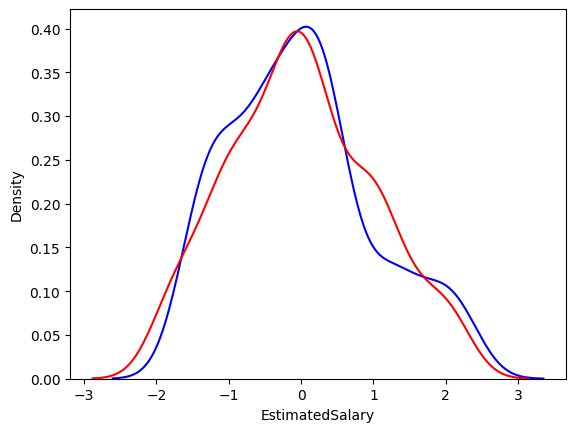

In [128]:
sns.kdeplot(X_train_scaled['EstimatedSalary'],color='b')
sns.kdeplot(X_train_scaled['Age'],color='r')

## Why Scailing is imp??

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr= LogisticRegression()
lr_scaled = LogisticRegression()

In [131]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [132]:
y_pred = lr.predict(X_test)
y_pred1 = lr_scaled.predict(X_test_scaled)

In [135]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for non-scaled data is ",accuracy_score(y_test, y_pred))
print("Accuracy for scaled data is ",accuracy_score(y_test,y_pred1))

Accuracy Score for non-scaled data is  0.8416666666666667
Accuracy for scaled data is  0.8416666666666667


In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dt = DecisionTreeClassifier()
dt_scaled =DecisionTreeClassifier()

In [146]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [148]:
y_pred2 = dt.predict(X_test)
y_pred3 = dt_scaled.predict(X_test_scaled)

In [149]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for non-scaled data is ",accuracy_score(y_test, y_pred2))
print("Accuracy for scaled data is ",accuracy_score(y_test,y_pred3))

Accuracy Score for non-scaled data is  0.8833333333333333
Accuracy for scaled data is  0.875


### when to use??
- It has no diadvantage on data
- Kmeans, KNN, PCA, ANN, GD -  apply standardization everytime since they realted to distance
- Decision Tree/ Gradient boost, XG boost,  Random Forest - not require